In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
path = '/home/andromeda/Temp/Hand-Gesture-Recognition/Sensor-Data/005/good.csv'

In [30]:
DT = 0.01
def get_displacement(acc):
    v = np.zeros(acc.shape)
    d = np.zeros(acc.shape)
    for i in range(acc.shape[0] - 1):
        v[i + 1] = v[i] + acc[i] * DT
        d[i + 1] = v[i] * DT + 0.5 * acc[i] * DT * DT
        
    return d

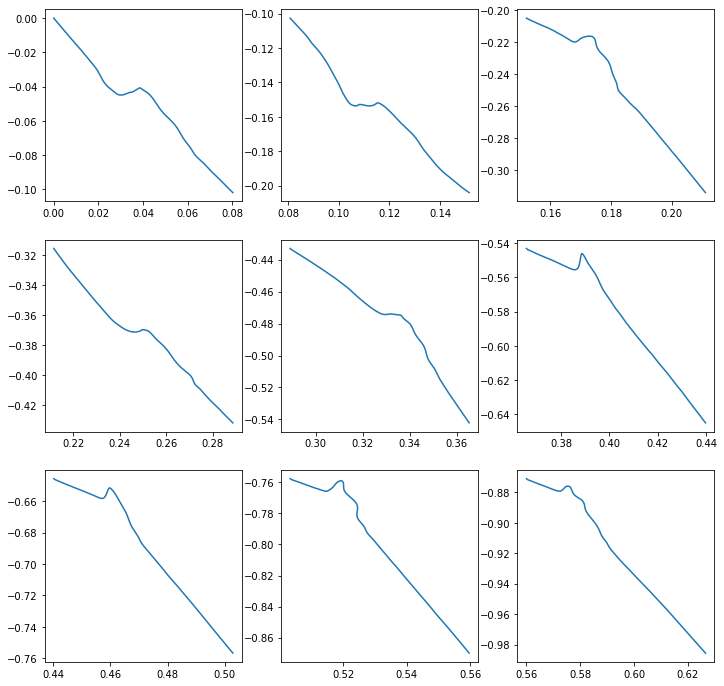

In [31]:
accx = pd.read_csv(path)['ACCx'].to_numpy()
accy = pd.read_csv(path)['ACCy'].to_numpy()
accz = pd.read_csv(path)['ACCz'].to_numpy()

x = get_displacement(accx).reshape(-1, 150)
y = get_displacement(accy).reshape(-1, 150)
z = get_displacement(accz).reshape(-1, 150)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.plot(y[i, :], z[i, :])
plt.show()

In [32]:
data = pd.read_csv(path)
lacx = data['ACCx_body'].to_numpy()
lacy = data['ACCy_body'].to_numpy()
lacz = data['ACCz_body'].to_numpy()

grax = accx - lacx
gray = accy - lacy
graz = accz - lacz

In [33]:
def get_user_acceleration_angle(gx, gy, gz, lx, ly, lz):

    # Calculates angle between linear acceleration and gravity
    # Argumnet(s):
    #    - gx, gy, gz : Gravity vector components
    #    - lx, ly, lz : Linear acceleration components

    print('Calculating Angle...', end = " ")
    n = gx * lx + gy * ly + gz * lz
    d = np.sqrt(gx ** 2 + gy ** 2 + gz ** 2) * np.sqrt(lx ** 2 + ly ** 2 + lz ** 2)

    # Division by zero is not allowed
    # Replacing all 0s with 0.000001
    #d = np.where(d == 0, 0.000001, d)

    theta = np.arccos(np.divide(n, d))
    print('Done!')
    
    return np.nan_to_num(theta)

In [34]:
theta = get_user_acceleration_angle(grax, gray, graz, lacx, lacy, lacz)

Calculating Angle... Done!


In [35]:
lm = np.sqrt(lacx ** 2 + lacy ** 2 + lacz ** 2)

accv = lm * np.cos(theta)
acch = lm * np.sin(theta)

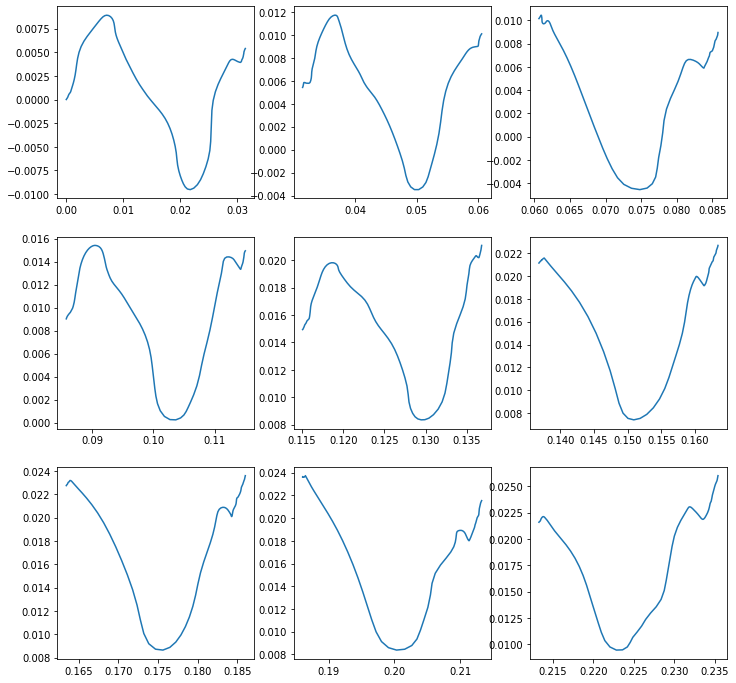

In [36]:
v = get_displacement(accv).reshape(-1, 150)
h = get_displacement(acch).reshape(-1, 150)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.plot(h[i, :], v[i, :])
plt.show()